In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


dataset=pd.read_csv("Fraud_Data.csv")
countries=pd.read_csv("IpAddress_to_Country.csv")

countries.columns

def transform_ip(arg) :
    try :
        return countries.country[(countries.lower_bound_ip_address < arg) & (countries.upper_bound_ip_address > arg)].iloc[0]
    except IndexError :
        return "Pays inconnu"  
dataset["Pays"] = dataset.ip_address.apply(transform_ip)

#The raw fraud dataset now has all desired columns.
dataset.head()

dataset.to_csv("Fraud_Data_with_Countries.csv",index=False)


In [0]:
fraud_dataset=pd.read_csv("Fraud_Data_with_Countries.csv")

In [4]:
fraud_dataset.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,Pays
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Pays inconnu
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [0]:
countries=pd.read_csv("IpAddress_to_Country.csv")

In [7]:
countries.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


# Basic Charts

# the correlation between sex and class.
Males make up more of the customer base of the company and thus are also involved in more of the fraud cases.
#No fraud(0) & Fraud(1)

Text(0, 0.5, 'Counts')

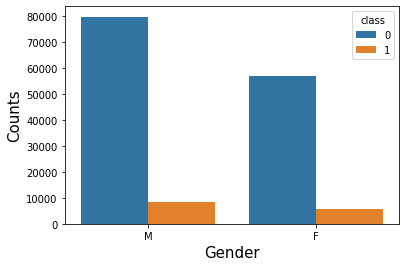

In [8]:
sns.countplot(x='sex', hue='class', data=fraud_dataset)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Counts", fontsize=15)

relationship between purchase value and fraud. there is a slight increase in the average purchase value associated with fraudulent activity.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.42499999999999716, 0.5, 'Purchase Value')

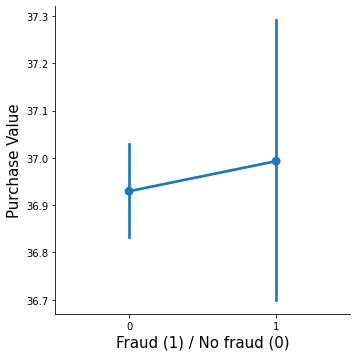

In [9]:
sns.factorplot(x="class", y="purchase_value", data=fraud_dataset)
plt.xlabel("Fraud (1) / No fraud (0)", fontsize=15)
plt.ylabel("Purchase Value", fontsize=15)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-5.825000000000003, 0.5, 'Age')

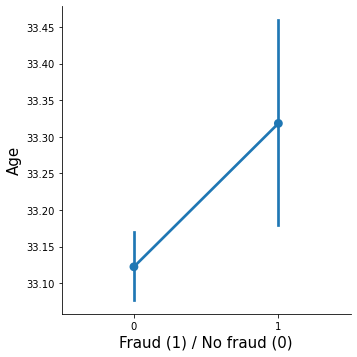

In [10]:
#relationship between age and fraud.
sns.factorplot(x="class", y="age",data=fraud_dataset)
plt.xlabel("Fraud (1) / No fraud (0)", fontsize=15)
plt.ylabel("Age", fontsize=15)

Text(0, 0.5, 'Counts')

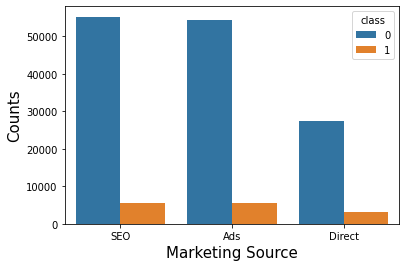

In [11]:
#relationship between marketing source and fraud.
sns.countplot(x='source', hue='class', data=fraud_dataset)
plt.xlabel("Marketing Source", fontsize=15)
plt.ylabel("Counts", fontsize=15)

Text(0, 0.5, 'Counts')

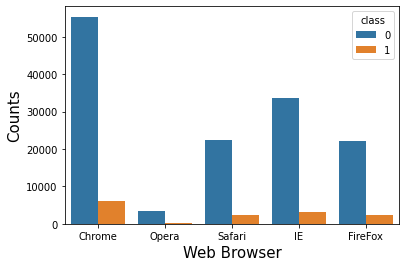

In [12]:
#relationship between browser used and fraud. 0(No Fraud)
sns.countplot(x='browser', hue='class', data=fraud_dataset)
plt.xlabel("Web Browser", fontsize=15)
plt.ylabel("Counts", fontsize=15)

Text(0.5, 1.0, 'Users in top 10 countries')

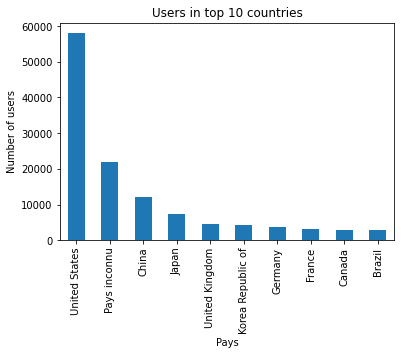

In [13]:
# Realtionship Between country of origin of fraud. 
fraud_dataset.groupby('Pays')['Pays'].count().sort_values(ascending=False).head(10)
fraud_dataset.groupby('Pays')['Pays'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of users')
plt.title('Users in top 10 countries')

Text(0.5, 1.0, 'US user distribution')

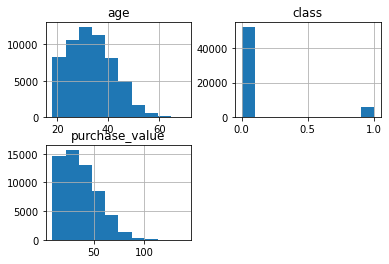

In [14]:
fraud_dataset[fraud_dataset['Pays'] == 'United States'][['class', 'age', 'purchase_value']].hist()
plt.title('US user distribution')

In [15]:
fraud_dataset.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,Pays
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Pays inconnu
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


relationship between the number of unique user ids assocated with either a single device or a single ip address. It seems that multiple user ids associated with either a unique device id or ip address is a large indicator of fraudulent behaviour.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(16.299999999999997, 0.5, 'User ids per IP Address')

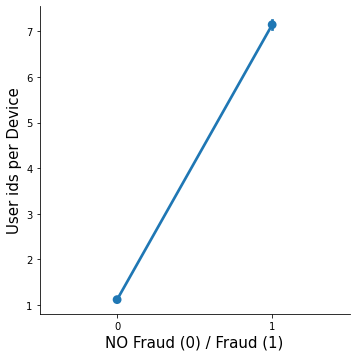

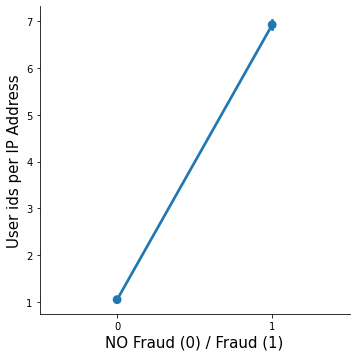

In [16]:
# Initialize a new dataframe
user_df = pd.DataFrame(columns=("class", "userids_per_deviceid", "userids_per_ipaddress"))
user_df["class"] = fraud_dataset["class"]

# Count the number of unique user ids associated each device
userid_count = fraud_dataset.groupby("device_id").user_id.count()
user_df["userids_per_deviceid"] = fraud_dataset.device_id.apply(lambda x: userid_count[x])

# Count the number of unique user ids associated each ip address
userid_count = fraud_dataset.groupby("ip_address").user_id.count()
user_df["userids_per_ipaddress"] = fraud_dataset.ip_address.apply(lambda x: userid_count[x])

sns.factorplot(x="class", y="userids_per_deviceid", data=user_df)
plt.xlabel("NO Fraud (0) / Fraud (1)", fontsize=15)
plt.ylabel("User ids per Device", fontsize=15)

sns.factorplot(x="class", y="userids_per_ipaddress", data=user_df)
plt.xlabel("NO Fraud (0) / Fraud (1)", fontsize=15)
plt.ylabel("User ids per IP Address", fontsize=15)

the relationship between the time between sign-up and purchase and fraud. small time periods between sign-up and purchase are also strongly correlated with fraud.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-8.825000000000003, 0.5, 'Sign-up to Purchase Time (Seconds)')

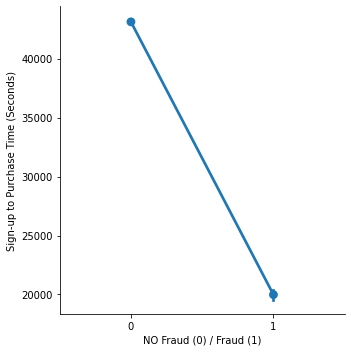

In [17]:
# Convert sign-up time and purchase time to datetime objects
fraud_dataset["signup_time"] = fraud_dataset.signup_time.apply(pd.to_datetime)
fraud_dataset["purchase_time"] = fraud_dataset.purchase_time.apply(pd.to_datetime)

# Add columns for the number of seconds between purchase and sign-up times
fraud_dataset["signup_to_purchase_seconds"] = (fraud_dataset.purchase_time - fraud_dataset.signup_time).apply(lambda x: x.seconds)

sns.factorplot(x="class", y="signup_to_purchase_seconds", data=fraud_dataset)
plt.xlabel("NO Fraud (0) / Fraud (1)", fontsize=10)
plt.ylabel("Sign-up to Purchase Time (Seconds)", fontsize=10)

 relationship between time (hour of the day, day of the week, week of the year) and fraud.

Text(0, 0.5, 'Count')

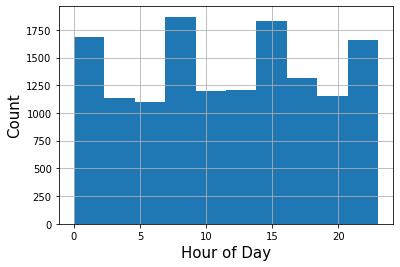

In [18]:
fraud_dataset[fraud_dataset["class"] == 1].signup_time.apply(lambda x: x.hour).hist()
plt.xlabel("Hour of Day", fontsize=15)
plt.ylabel("Count", fontsize=15)

Text(0, 0.5, 'Count')

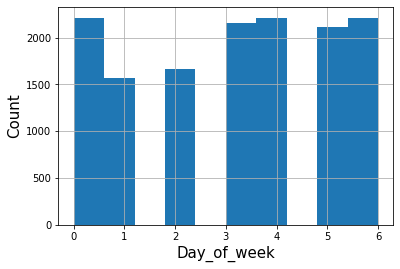

In [19]:
fraud_dataset[fraud_dataset["class"] == 1].signup_time.apply(lambda x: x.dayofweek).hist()
plt.xlabel("Day_of_week", fontsize=15)
plt.ylabel("Count", fontsize=15)

Text(0, 0.5, 'Count')

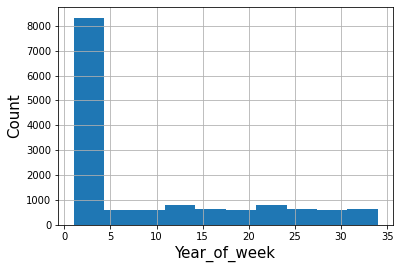

In [20]:
fraud_dataset[fraud_dataset["class"] == 1].signup_time.apply(lambda x: x.week).hist()
plt.xlabel("Year_of_week", fontsize=15)
plt.ylabel("Count", fontsize=15)

# Feature Engineering

In [21]:
fraud_dataset.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,Pays,signup_to_purchase_seconds
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Pays inconnu,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461


In [22]:
user_df.head()

,class,userids_per_deviceid,userids_per_ipaddress
0,0,1,1
1,0,1,1
2,1,12,12
3,0,1,1
4,0,1,1


In [23]:
user_df["purchase_value"]=fraud_dataset.purchase_value
user_df["source"]=fraud_dataset.source
user_df["browser"]=fraud_dataset.browser
user_df["sex"]=fraud_dataset.sex
user_df["age"]=fraud_dataset.age
user_df["Country"]=fraud_dataset.Pays
user_df["signup_to_purchase_seconds"]=fraud_dataset.signup_to_purchase_seconds
user_df.head()

,class,userids_per_deviceid,userids_per_ipaddress,purchase_value,source,browser,sex,age,Country,signup_to_purchase_seconds
0,0,1,1,34,SEO,Chrome,M,39,Japan,13882
1,0,1,1,16,Ads,Chrome,F,53,United States,17944
2,1,12,12,15,SEO,Opera,M,53,United States,1
3,0,1,1,44,SEO,Safari,M,41,Pays inconnu,60085
4,0,1,1,39,Ads,Safari,M,45,United States,41461


In [0]:
user_df['sex'].replace(['M','F'],[0,1],inplace=True)
user_df['source'].replace(['SEO','Ads','Direct'],[0,1,2],inplace=True)
user_df['browser'].replace(['Chrome','Opera','Safari','IE','FireFox'],[0,1,2,3,4],inplace=True)

In [25]:
user_df.head()

,class,userids_per_deviceid,userids_per_ipaddress,purchase_value,source,browser,sex,age,Country,signup_to_purchase_seconds
0,0,1,1,34,0,0,0,39,Japan,13882
1,0,1,1,16,1,0,1,53,United States,17944
2,1,12,12,15,0,1,0,53,United States,1
3,0,1,1,44,0,2,0,41,Pays inconnu,60085
4,0,1,1,39,1,2,0,45,United States,41461


In [0]:
user_df_2=user_df.copy()

In [0]:
user_df=pd.get_dummies(user_df)

In [28]:
user_df.head()

,class,userids_per_deviceid,userids_per_ipaddress,purchase_value,source,browser,sex,age,signup_to_purchase_seconds,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bermuda,Country_Bhutan,Country_Bolivia,Country_Bonaire; Sint Eustatius; Saba,Country_Bosnia and Herzegowina,Country_Botswana,Country_Brazil,Country_British Indian Ocean Territory,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,...,Country_Saint Kitts and Nevis,Country_Saint Martin,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Singapore,Country_Slovakia (SLOVAK Republic),Country_Slovenia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Taiwan; Republic of China (ROC),Country_Tajikistan,Country_Tanzania United Republic of,Country_Thailand,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Viet Nam,Country_Virgin Islands (U.S.),Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0,1,1,34,0,0,0,39,13882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,16,1,0,1,53,17944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,12,12,15,0,1,0,53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,1,44,0,2,0,41,60085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,39,1,2,0,45,41461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
x=user_df.drop('class',axis='columns')
y=user_df['class']

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [32]:
from sklearn.tree import DecisionTreeClassifier
meaure_gini=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=20)
meaure_gini.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
meaure_gini.score(x_train,y_train),meaure_gini.score(x_test,y_test)

(0.956786804423893, 0.9560268669556298)

In [0]:
y_pred=meaure_gini.predict(x_test)

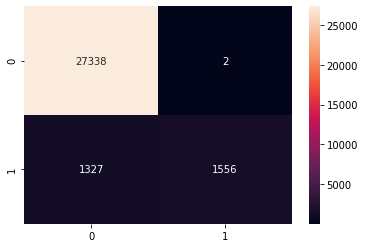

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [36]:
cm

array([[27338,     2],
       [ 1327,  1556]])

In [37]:
y_test.mean()

0.09539092743936736

# Classifier without Sampling

In [0]:
x=user_df.drop('class',axis='columns')
y=user_df['class']

In [39]:
user_df.head()

,class,userids_per_deviceid,userids_per_ipaddress,purchase_value,source,browser,sex,age,signup_to_purchase_seconds,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bermuda,Country_Bhutan,Country_Bolivia,Country_Bonaire; Sint Eustatius; Saba,Country_Bosnia and Herzegowina,Country_Botswana,Country_Brazil,Country_British Indian Ocean Territory,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,...,Country_Saint Kitts and Nevis,Country_Saint Martin,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Singapore,Country_Slovakia (SLOVAK Republic),Country_Slovenia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Taiwan; Republic of China (ROC),Country_Tajikistan,Country_Tanzania United Republic of,Country_Thailand,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Viet Nam,Country_Virgin Islands (U.S.),Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0,1,1,34,0,0,0,39,13882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,16,1,0,1,53,17944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,12,12,15,0,1,0,53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,1,44,0,2,0,41,60085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,39,1,2,0,45,41461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
num_col = ["purchase_value","age","signup_to_purchase_seconds"]
cat_col = x.drop(["purchase_value","age","signup_to_purchase_seconds"],axis=1).columns
x_num = x[num_col]
x_cat = x[cat_col]
x_train_num,x_test_num,x_train_cat,x_test_cat,y_train,y_test=train_test_split(x_num,x_cat,y,test_size=0.2)

sc_x = StandardScaler()
x_train_num_norm = pd.DataFrame(sc_x.fit_transform(x_train_num),columns=x_train_num.columns, index = x_train_num.index)
x_test_num_norm = pd.DataFrame(sc_x.transform(x_test_num),columns=x_test_num.columns, index = x_test_num.index)

x_train = pd.merge(x_train_num_norm, x_train_cat,left_index=True, right_index=True)
x_test = pd.merge(x_test_num_norm, x_test_cat,left_index=True, right_index=True)

In [41]:
from sklearn.linear_model import LogisticRegression
cat=LogisticRegression()
cat.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
cat.score(x_train,y_train),cat.score(x_test,y_test)

(0.9504917734450612, 0.950468186480495)

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(cat,x,y,cv=10).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9514333761644332

In [44]:
y_pred=cat.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

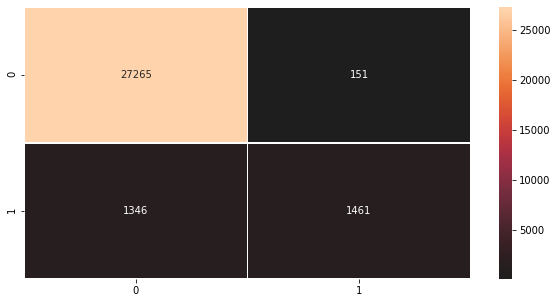

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt="d",linewidths=.6,center=6)

In [46]:
cm

array([[27265,   151],
       [ 1346,  1461]])

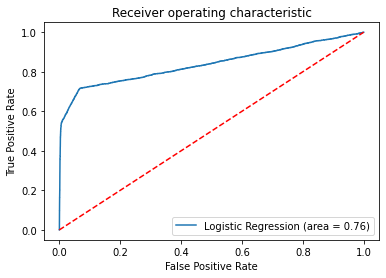

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, cat.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, cat.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#it means there is 76% chance that model will be able to distinguish between positive class and negative class.

# Classifiers after undersampling

In [48]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_rdmsamp, y_rdmsamp = rus.fit_resample(x, y)

x_rdmsamp = pd.DataFrame(x_rdmsamp, columns = x.columns)

x_num = x_rdmsamp[num_col]
x_cat = x_rdmsamp[cat_col]

x_train_num, x_test_num, x_train_cat, x_test_cat, y_train, y_test = train_test_split(x_num, x_cat, y_rdmsamp, test_size = 0.2)

sc_x = StandardScaler()
x_train_num_norm = pd.DataFrame(sc_x.fit_transform(x_train_num),columns=x_train_num.columns, index = x_train_num.index)
x_test_num_norm = pd.DataFrame(sc_x.transform(x_test_num),columns=x_test_num.columns, index = x_test_num.index)

x_train = pd.merge(x_train_num_norm, x_train_cat,left_index=True, right_index=True)
x_test = pd.merge(x_test_num_norm, x_test_cat,left_index=True, right_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [49]:
from sklearn.linear_model import LogisticRegression
cat=LogisticRegression()
cat.fit(x_train,y_train)
cat.score(x_train,y_train),cat.score(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.8257585795680403, 0.8198198198198198)

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(cat,x,y,cv=10).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9514333761644332

In [51]:
y_pred=cat.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 1, 1])

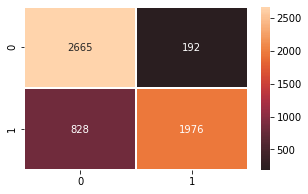

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d",linewidths=.6,center=1)

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8079844550432785

In [0]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.metrics import make_scorer

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) :
Accuracy: 0.67 (+/- 0.02)


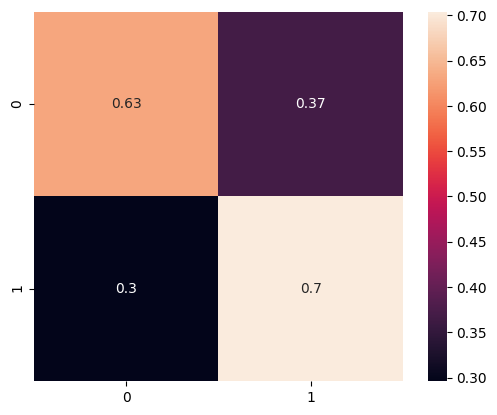

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) :
Accuracy: 0.83 (+/- 0.01)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


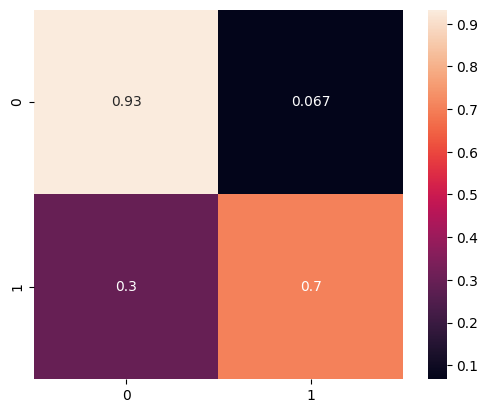

In [55]:
models = (
    BernoulliNB(),
    LogisticRegression()  
)

for m in models :
      cv = cross_val_score(m, x_train, y_train, cv=10)
      print(m, ":")
      print("Accuracy: %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2))
      m.fit(x_train, y_train)
      pred = m.predict(x_test)
      cm = confusion_matrix(y_test, pred, normalize="true")
      sns.heatmap(cm, annot=True, square=True)
      plt.show()

Tuning hyper-parameters for precision

{'n_estimators': 500} :
Accuracy: 0.83 (+/- 0.01)


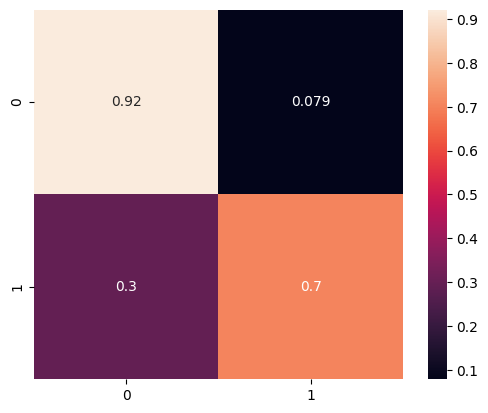

Tuning hyper-parameters for recall

{'n_estimators': 500} :
Accuracy: 0.82 (+/- 0.00)


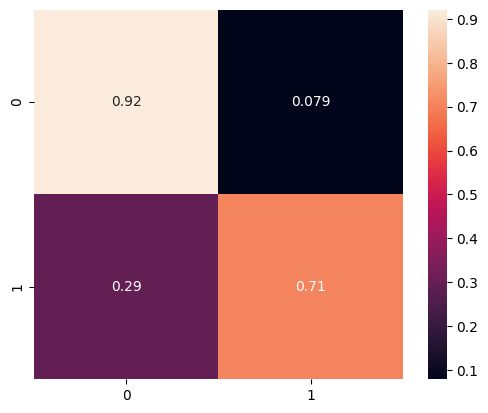

In [56]:
m = RandomForestClassifier()
param_grid = {'n_estimators': [100,200,500,1000]}
scores = ['precision', 'recall']

for score in scores:
    print("Tuning hyper-parameters for %s" % score)
    print()
    grid = GridSearchCV(m, param_grid, scoring='%s_macro' % score)
    grid.fit(x_train,y_train)
    print(grid.best_params_, ":")
    mean = max(grid.cv_results_['mean_test_score'])
    std = grid.cv_results_['std_test_score'][grid.cv_results_['mean_test_score'].tolist().index(max(grid.cv_results_['mean_test_score']))]
    print("Accuracy: %0.2f (+/- %0.2f)" % (mean, std * 2))
    pred = grid.predict(x_test)
    cm = confusion_matrix(y_test, pred, normalize="true")
    sns.heatmap(cm, annot=True, square=True)
    plt.show()

Tuning hyper-parameters for precision

{'learning_rate': 0.1, 'n_estimators': 100} :
Accuracy: 0.84 (+/- 0.01)


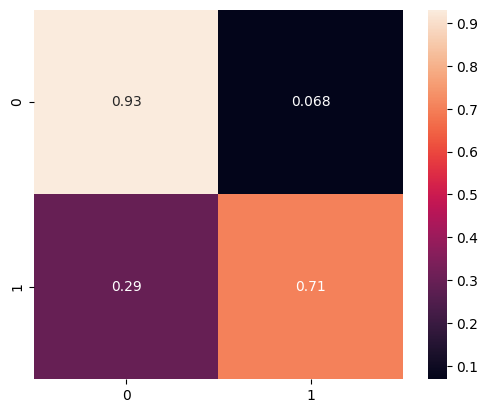

Tuning hyper-parameters for recall

{'learning_rate': 0.1, 'n_estimators': 100} :
Accuracy: 0.83 (+/- 0.01)


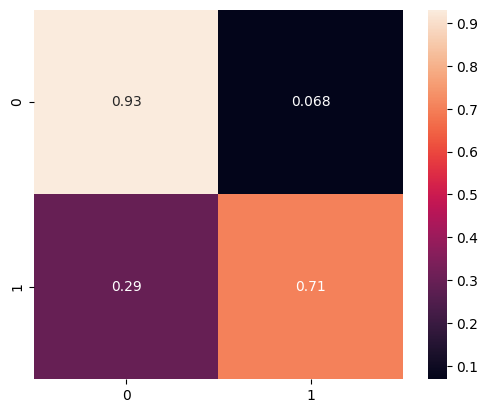

Tuning hyper-parameters for precision

{'learning_rate': 0.01, 'n_estimators': 250} :
Accuracy: 0.84 (+/- 0.01)


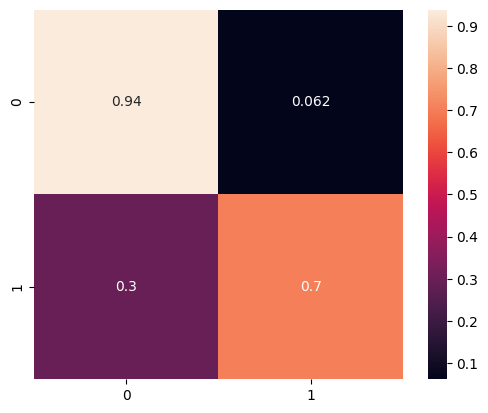

Tuning hyper-parameters for recall

{'learning_rate': 0.01, 'n_estimators': 250} :
Accuracy: 0.83 (+/- 0.01)


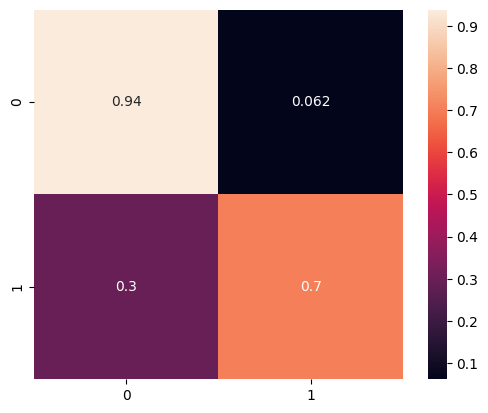

In [57]:
models = [AdaBoostClassifier(), GradientBoostingClassifier()]
param_grid = {'n_estimators' : [100,250,500], 'learning_rate' : [0.1,0.05,0.01]}
scores = ['precision', 'recall']

for m in models:
    for score in scores:
        print("Tuning hyper-parameters for %s" % score)
        print()
        grid = GridSearchCV(m, param_grid, scoring='%s_macro' % score)
        grid.fit(x_train,y_train)
        print(grid.best_params_, ":")
        mean = max(grid.cv_results_['mean_test_score'])
        std = grid.cv_results_['std_test_score'][grid.cv_results_['mean_test_score'].tolist().index(max(grid.cv_results_['mean_test_score']))]
        print("Accuracy: %0.2f (+/- %0.2f)" % (mean, std * 2))
        pred = grid.predict(x_test)
        cm = confusion_matrix(y_test, pred, normalize="true")
        sns.heatmap(cm, annot=True, square=True)
        plt.show()

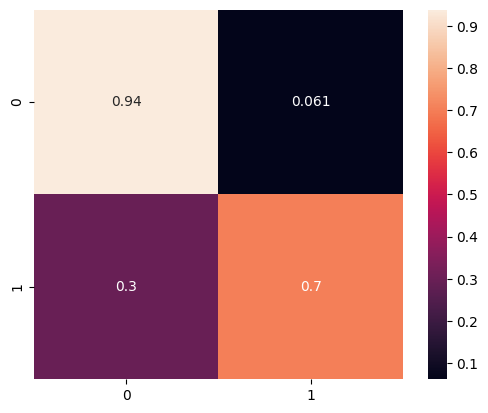

In [58]:
m = XGBClassifier()

cv = cross_val_score(m, x_train, y_train, cv=10)
#print(m, ":")
#print("Accuracy: %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2))
m.fit(x_train, y_train)
pred = m.predict(x_test)
cm = confusion_matrix(y_test, pred, normalize="true")
sns.heatmap(cm, annot=True, square=True)
plt.show()

In [0]:
m = svm.SVC()
param_grid = [{'base_estimator__kernel': ['rbf'], 'base_estimator__gamma': [1e-3, 1e-4], 'base_estimator__C': [1, 10, 100, 1000]}, {'base_estimator__kernel': ['linear'], 'base_estimator__C': [1, 10, 100, 1000]}] 
scores = ['precision', 'recall']

for score in scores:
    print("Tuning hyper-parameters for %s" % score)
    print()
    grid = GridSearchCV(BaggingClassifier(m), param_grid, scoring='%s_macro' % score)
    grid.fit(x_train,y_train)
    print(grid.best_params_, ":")
    mean = max(grid.cv_results_['mean_test_score'])
    std = grid.cv_results_['std_test_score'][grid.cv_results_['mean_test_score'].tolist().index(max(grid.cv_results_['mean_test_score']))]
    print("Accuracy: %0.2f (+/- %0.2f)" % (mean, std * 2))
    pred = grid.predict(x_test)
    cm = confusion_matrix(y_test, pred, normalize="true")
    sns.heatmap(cm, annot=True, square=True)
    plt.show()

Tuning hyper-parameters for precision



In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

# GRID

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
Naive_Bayes = BernoulliNB()
naive_bayes_param_grid = {
    
                 "alpha":[1.0, 0.8, 0.7, 0.5],
                 "fit_prior": [True, False]
    
                 }


gsNaive_Bayes = GridSearchCV(Naive_Bayes, naive_bayes_param_grid, cv =10, scoring ='accuracy', n_jobs=-1, verbose=1)
gsNaive_Bayes.fit(x_train, y_train)
gsNaive_Bayes_best = gsLog.best_estimator_
gsNaive_Bayes.best_score_

# Voting_Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

In [0]:
classifiers = []

classifiers.append(RandomForestClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(LogisticRegression())
classifiers.append(BernoulliNB())

In [0]:
from sklearn.model_selection import cross_val_score

cv_results = []
for classifier in classifiers:
  cv_results.append(cross_val_score(classifier, x_train, y_train, cv=10 ,scoring="accuracy"))

In [0]:
cv_results

In [0]:
results = pd.DataFrame({"Algorithm": ["Random_Forest", "GradientBoosting", "LogisticRegression", "NaiveBayes"],
             "Accuracy_mean": [cv_result.mean() for cv_result in cv_results],
             "Std": [cv_result.std() for cv_result in cv_results]})

results = results.sort_values(by="Accuracy_mean", ascending=False)
results

# GRID

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(svm, param_grid, verbose=2, n_jobs=-1)
grid

In [0]:
grid.fit(X_train,y_train)

In [0]:
grid.best_params_

In [0]:
model=grid.best_estimator_
model.score(X_test,y_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d",linewidths=.6,center=1)

# Ensembling & Stacking models

In [0]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [0]:
user_df_2=user_df_2.drop('Country',axis='columns')

In [0]:
user_df_2.head()
user_df_esm=user_df_2.copy()
user_df_esm.head()

In [0]:
#rf=RandomForestClassifier(n_estimators=500,max_depth=6,max_features='sqrt')

In [0]:
et=ExtraTreesClassifier(n_estimators=500,max_depth=6)

In [0]:
ada=AdaBoostClassifier(n_estimators=500,learning_rate=0.75)

In [0]:
gb=GradientBoostingClassifier(n_estimators=500,max_depth=6)

In [0]:
svc=SVC(kernel='linear',C=0.025,probability=True)

In [0]:
x=user_df_esm.drop('class',axis=1)
y=user_df_esm['class']

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)
x_train1,x_train2,y_train1,y_train2=train_test_split(x_train,y_train,test_size=0.5,stratify=y_train)

In [0]:
rf.fit(x_train1,y_train1)
et.fit(x_train1,y_train1)
ada.fit(x_train1,y_train1)
gb.fit(x_train1,y_train1)
svc.fit(x_train1,y_train1)

#rf_train_pred = rf.predict_proba(x_train2)
et_train_pred = et.predict_proba(x_train2)
ada_train_pred = ada.predict_proba(x_train2)
gb_train_pred = gb.predict_proba(x_train2)
svc_train_pred = svc.predict_proba(x_train2)

#rf_test_pred = rf.predict_proba(x_test)
et_test_pred = et.predict_proba(x_test)
ada_test_pred = ada.predict_proba(x_test)
gb_test_pred = gb.predict_proba(x_test)
svc_test_pred = svc.predict_proba(x_test)

In [0]:
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
ada_feature = ada.feature_importances_
gb_feature = gb.feature_importances_

In [0]:
feature_dataframe=pd.DataFrame({'Random Forest feature importances':rf_feature,'Extra Trees  feature importances':et_feature,
                               'AdaBoost feature importances':ada_feature,'Gradient Boost feature importances':gb_feature},
                              index=x.columns.values)
feature_dataframe

In [0]:
import seaborn as sns
sns.heatmap(feature_dataframe,annot=True)